# Coding a simple decision tree with mean and 70/30 ratio
***

This notebook was developed from an initial template given by **Code Canteen** and data scientist Lila Rose. They can be reach at http://futurecoders.org.uk/. The initial work was based on using medians as indicators and a train/test ratio of 80/20.<br>

In the following notebooks, we will use different ratios and different indicators, to see how the decision trees change (or not). For the complete explanations, please refer to the notebook *Decision-Tree-coded-model-Median-80-20*.

Author of the final document: Ester Giménez Mojón.

In this worksheet we are going to code a decision tree, which will use the calculated probabilities to make decisions about wheter a row of given data would be classified as Iris-virginica, Iris setosa or Iris versicolor, or not, based on sepal and petal dimensions. With this information, species would be further predicted by probabilities of error.

This notebook will provide a decision tree for every one of the three different types of Iris considered. Each tree will be independent of each other.

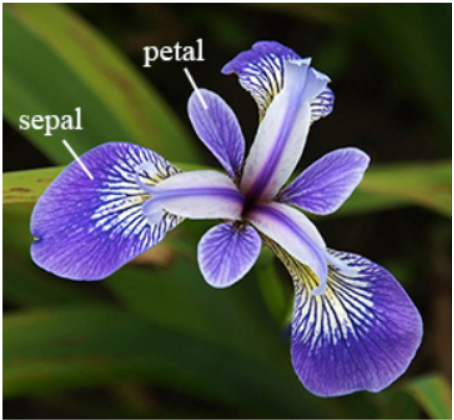

We will use:<br>
- **mean** instead of **median** as indicator.<br>
- train/test percentages as 70/30.<br>

### 1. READ THE IRIS DATASET
***

Like with the previous notebook, we will use the same iris dataset, located at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data.<br>

The columns in the CSV file do not have headings, so we need to add them:<br>

> url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"<br>
> names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']<br>
> iris_data = pd.read_csv(url, name=names)<br>

There are 150 rows of data, no empty spaces.<br>

In [50]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
iris_data.median()

C:\Users\Anaconda\AppData\Local\Temp/ipykernel_11712/2365770678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


sepal-length    5.80
sepal-width     3.00
petal-length    4.35
petal-width     1.30
dtype: float64

### 2. SPLIT THE DATA INTO TRAIN AND TEST DATASETS
***

In this case, I will use 70% train, 30% test as the split and the mean as indicator.

In [53]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.30, random_state=2)
# random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show
# different results, due to the random test_size, as it will choose different items every time.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The splitting will be used later, to see if the remaining data (the test set) relates very well with the train set.<br>

In order to manage decision trees, we need to decide which item we will use as a discriminator for separating values above and below it. We can use the median, the mean, quartiles (25 or 75), etc. In this case, I will use the means.<br>

### 3. ASSUMPTIONS
***

Same as in the previous notebook, we will only use the data we have on the 3 species as a representation of the species.

In [54]:
sl_indicator = iris_data['sepal-length'].mean()
sw_indicator = iris_data['sepal-width'].mean()
pl_indicator = iris_data['petal-length'].mean()
pw_indicator = iris_data['petal-width'].mean()

print(sl_indicator, sw_indicator, pl_indicator, pw_indicator)
display(train.describe())

5.843333333333335 3.0540000000000007 3.7586666666666693 1.1986666666666672


,sepal-length,sepal-width,petal-length,petal-width
count,105.000000,105.000000,105.000000,105.000000
mean,5.887619,3.057143,3.829524,1.220952
std,0.820494,0.442862,1.765749,0.760275
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The means change slightly because it is not the same to calculate the averages of the whole set than the means of the train set.<br>

- means of the whole set: 5.843, 3.054, 3.7587, 1.198<br>
- means after split: 5.887, 3.057, 3.829, 1.221

### 4. PROPORTION OF VALUES ON or ABOVE AND BELOW THE INDICATOR
***

This calculates the probability of elements in a specified column, that are:<br>

- **above** the mean in relation to the total number of elements in that column.<br>
- **below** the mean in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values.

__SEPAL LENGHT__

In [55]:
# Calculate the proportion of values in sepal-length column that are on or above the median
sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
print(sl_vi_above_indicator)
print(sl_vi_below_indicator)

0.47619047619047616
0.5238095238095238


__SEPAL WIDTH__

In [56]:
# Calculate the proportion of values in sepal-width column that are on or above the median

sw_indicator_vi_above = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_indicator_vi_below = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
print(sw_indicator_vi_above)
print(sw_indicator_vi_below)

0.44761904761904764
0.5523809523809524


__PETAL LENGHT__

In [57]:
# Calculate the proportion of values in petal-length column that are on or above the median
pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
print(pl_vi_above_indicator)
print(pl_vi_below_indicator)

0.638095238095238
0.3619047619047619


__PETAL WIDTH__

In [58]:
# Calculate the proportion of values in petal-width column that are on or above the median
pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
print(pw_vi_above_indicator)
print(pw_vi_below_indicator)

0.6
0.4


The results are as follow:

|MEANS|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----|------------|-----------|------------|-----------| 
|xx_vi_above_indicator|0.4762|0.4476|0.6381|0.6|
|xx_vi_below_indicator|0.5238|0.5524|0.3619|0.4|

The means before and after the split are almost identical, so the probabilities below and above the indicator are the same as with the mean 80/20.

### 5 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) ON OR ABOVE THE INDICATOR THAT ARE OF A GIVEN SPECIES 

We will calculate the probability of a row being on or above the indicator and of a given species at the same time. <br>
The same will be done with the rows being under the indicator and of a given species at the same time.<br>
The calculations will be done for every column as well.<br>

The steps would be, for example:<br>

- Filter by values in the sepal-length column that are on or above the median (sl_indicator) and the species column being `Iris-virginica`.<br>
- Filter by values in the sepal-length column that are on or above the median (sl_indicator) only.<br>
- Divide both results.

Instead of filtering the columns again and repeating the steps above to know which numbers are ON or ABOVE the indicator and NOT of one of the given species, we will do a substraction:<br>

> = 1 - (the proportion of those that are `Iris virginica`)

### 5.1 - On or above the indicator and `Iris virginica` 

In [59]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-virginica
sl_vi_above = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above, sw_vi_above, pl_vi_above, pw_vi_above)

0.64 0.23404255319148937 0.5522388059701493 0.5873015873015873


In [60]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-virginica

no_sl_vi_above = 1 - sl_vi_above
no_sw_vi_above = 1 - sw_vi_above
no_pl_vi_above = 1 - pl_vi_above
no_pw_vi_above = 1 - pw_vi_above

print(no_sl_vi_above, no_sw_vi_above, no_pl_vi_above, no_pw_vi_above)

0.36 0.7659574468085106 0.4477611940298507 0.4126984126984127


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.64|0.234|0.5522|0.5873|
|above not Iris v.|0.36|0.766|0.4477|0.4127|

### 5.2 - On or above the indicator and `Iris setosa`

In [61]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-setosa
sl_vi_above_cet = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_cet = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_cet = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_cet = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_cet, sw_vi_above_cet, pl_vi_above_cet, pw_vi_above_cet)

0.0 0.6170212765957447 0.0 0.0


In [62]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-setosa

no_sl_vi_above_cet = 1 - sl_vi_above_cet
no_sw_vi_above_cet = 1 - sw_vi_above_cet
no_pl_vi_above_cet = 1 - pl_vi_above_cet
no_pw_vi_above_cet = 1 - pw_vi_above_cet

print(no_sl_vi_above_cet, no_sw_vi_above_cet, no_pl_vi_above_cet, no_pw_vi_above_cet)

1.0 0.3829787234042553 1.0 1.0


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris s.|0.0|0.617|0.0|0.0|
|above not Iris s.|1.0|0.383|1.0|1.0|

### 5.3 - On or above the indicator and `Iris versicolor`

In [63]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-versicolor
sl_vi_above_ver = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_ver = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_ver = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_ver = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_ver, sw_vi_above_ver, pl_vi_above_ver, pw_vi_above_ver)

0.36 0.14893617021276595 0.44776119402985076 0.4126984126984127


In [64]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-versicolor

no_sl_vi_above_ver = 1 - sl_vi_above_ver
no_sw_vi_above_ver = 1 - sw_vi_above_ver
no_pl_vi_above_ver = 1 - pl_vi_above_ver
no_pw_vi_above_ver= 1 - pw_vi_above_ver

print(no_sl_vi_above_ver, no_sw_vi_above_ver, no_pl_vi_above_ver, no_pw_vi_above_ver)

0.64 0.851063829787234 0.5522388059701493 0.5873015873015873


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris ver.|0.36|0.1489|0.4477|0.4127|
|above not Iris ver.|0.64|0.851|0.5522|0.587|

### 6 - CALCULATION OF THE PROPORTION OF VALUES (CONDITIONED PROBABILITY) BELOW THE INDICATOR THAT ARE OF A GIVEN SPECIES

Same as section 5 but below the indicator.

### 6.1 - Below mean and `Iris virginica`

In [65]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica

sl_vi_below = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below = (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below, sw_vi_below, pl_vi_below, pw_vi_below)

0.09090909090909091 0.4482758620689655 0.0 0.0


In [66]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-virginica

no_sl_vi_below = 1-sl_vi_below
no_sw_vi_below = 1-sw_vi_below
no_pl_vi_below = 1-pl_vi_below
no_pw_vi_below = 1-pw_vi_below

print(no_sl_vi_below, no_sw_vi_below, no_pl_vi_below, no_pw_vi_below)

0.9090909090909091 0.5517241379310345 1.0 1.0


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris v.|0.0909|0.4483|0.0|0.0|
|below not Iris v.|0.90909|0.5517|1.0|1.0|

### 6.2 - Below mean and `Iris setosa`

In [67]:
# calculate the proportion of results where the value is below median that are of the species Iris-setosa

sl_vi_below_set = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_set= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_set = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_set = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_set, sw_vi_below_set, pl_vi_below_set, pw_vi_below_set)

0.6 0.06896551724137931 0.868421052631579 0.7857142857142857


In [68]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-setosa

no_sl_vi_below_set = 1-sl_vi_below_set
no_sw_vi_below_set = 1-sw_vi_below_set
no_pl_vi_below_set = 1-pl_vi_below_set
no_pw_vi_below_set = 1-pw_vi_below_set

print(no_sl_vi_below_set, no_sw_vi_below_set, no_pl_vi_below_set, no_pw_vi_below_set)

0.4 0.9310344827586207 0.13157894736842102 0.2142857142857143


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris s.|0.6|0.0689|0.8684|0.7857|
|below not Iris s.|0.4|0.931|0.1316|0.2143|

### 6.3 Below mean and `Iris versicolor`

In [69]:
# calculate the proportion of results where the value is below median that are of the species Iris-versicolor

sl_vi_below_ver = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_ver= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_ver = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_ver = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())

print(sl_vi_below_ver, sw_vi_below_ver, pl_vi_below_ver, pw_vi_below_ver)

0.3090909090909091 0.4827586206896552 0.13157894736842105 0.21428571428571427


In [70]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-versicolor

no_sl_vi_below_ver = 1-sl_vi_below_ver
no_sw_vi_below_ver = 1-sw_vi_below_ver
no_pl_vi_below_ver = 1-pl_vi_below_ver
no_pw_vi_below_ver = 1-pw_vi_below_ver

print(no_sl_vi_below_ver, no_sw_vi_below_ver, no_pl_vi_below_ver, no_pw_vi_below_ver)

0.6909090909090909 0.5172413793103448 0.868421052631579 0.7857142857142857


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris ver.|0.3091|0.4827|0.1316|0.2143|
|below not Iris ver.|0.6909|0.5172|0.8684|0.7857|

### 7 - Calculate Gini Index of the above and below parts, by species (not of the column).

Each time you split the data set into train and test, you will get a slightly 
different mix and so your train data set will be slightly different. We are 
going to try to look at how well we might predict a particular species from 
the 3 columns. Let's use the `Iris-virginica` species and try to predict if a 
row would be that species or not, based on the four dimensions columns.
<br>

A Gini Index is a measure of the probability of a randomly chosen prediction 
being incorrect. The most influential column will have the lowest Gini Index 
and that will be put at the top of our decision tree. <br>

The formula for the Gini Index is: <br>
<br>
Gini Index = 1 - (the sum of the squares of the proportion values calculated above) <br>
<br>
To calculate the Gini Index for, use the following example: <br>
<br>
gini_sl_vi = 1 - (sl_vi_above2 + no_sl_vi_above2)<br>

### 7.1 Gini Index of `Iris virginica` <br>

In [71]:
# calculate the Gini Index for the proportion of those above median which are Iris_virginica, for all four columns

gini_sl_vi_above = 1 - (sl_vi_above**2 + no_sl_vi_above**2)
gini_sw_vi_above = 1 - (sw_vi_above**2 + no_sw_vi_above**2)
gini_pl_vi_above = 1 - (pl_vi_above**2 + no_pl_vi_above**2)
gini_pw_vi_above = 1 - (pw_vi_above**2 + no_pw_vi_above**2)

print(gini_sl_vi_above, gini_sw_vi_above, gini_pl_vi_above, gini_pw_vi_above)

0.4608 0.35853327297419657 0.49454221430162615 0.4847568657092467


In [72]:
# calculate the Gini Index for the proportion of those below median which are Iris_virginica, for all four columns

gini_sl_vi_below = 1 - (sl_vi_below**2 + no_sl_vi_below**2)
gini_sw_vi_below = 1 - (sw_vi_below**2 + no_sw_vi_below**2)
gini_pl_vi_below = 1 - (pl_vi_below**2 + no_pl_vi_below**2)
gini_pw_vi_below = 1 - (pw_vi_below**2 + no_pw_vi_below**2)

print(gini_sl_vi_below, gini_sw_vi_below, gini_pl_vi_below, gini_pw_vi_below)

0.16528925619834722 0.4946492271105827 0.0 0.0


The results for `Iris Virginica` are as follow:

|Gini Index I.virg|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.4608|0.3585|0.4945|0.4847|
|below|0.1653|0.4946|0.0|0.0|

### 7.2 Gini Index of `Iris setosa` <br>

In [73]:
# calculate the Gini Index for the proportion of those above median which are Iris_setosa, for all four columns

gini_sl_vi_above_cet = 1 - (sl_vi_above_cet**2 + no_sl_vi_above_cet**2)
gini_sw_vi_above_cet = 1 - (sw_vi_above_cet**2 + no_sw_vi_above_cet**2)
gini_pl_vi_above_cet = 1 - (pl_vi_above_cet**2 + no_pl_vi_above_cet**2)
gini_pw_vi_above_cet = 1 - (pw_vi_above_cet**2 + no_pw_vi_above_cet**2)

print(gini_sl_vi_above_cet, gini_sw_vi_above_cet, gini_pl_vi_above_cet, gini_pw_vi_above_cet)

0.0 0.47261204164780446 0.0 0.0


In [74]:
# calculate the Gini Index for the proportion of those below median which are Iris_setosa, for all four columns

gini_sl_vi_below_set = 1 - (sl_vi_below_set**2 + no_sl_vi_below_set**2)
gini_sw_vi_below_set = 1 - (sw_vi_below_set**2 + no_sw_vi_below_set**2)
gini_pl_vi_below_set = 1 - (pl_vi_below_set**2 + no_pl_vi_below_set**2)
gini_pw_vi_below_set = 1 - (pw_vi_below_set**2 + no_pw_vi_below_set**2)

print(gini_sl_vi_below_set, gini_sw_vi_below_set, gini_pl_vi_below_set, gini_pw_vi_below_set)

0.48 0.1284185493460166 0.2285318559556786 0.33673469387755106


The results for `Iris setosa` are as follow:

|Gini Index I.setosa|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-------------------|------------|-----------|------------|-----------| 
|above|0.0|0.4726|0.0|0.0|
|below|0.48|0.1284|0.2285|0.3367|

### 7.3 Gini Index of `Iris versicolor` <br>

In [75]:
# calculate the Gini Index for the proportion of those above median which are Iris_versicolor, for all four columns

gini_sl_vi_above_ver = 1 - (sl_vi_above_ver**2 + no_sl_vi_above_ver**2)
gini_sw_vi_above_ver = 1 - (sw_vi_above_ver**2 + no_sw_vi_above_ver**2)
gini_pl_vi_above_ver = 1 - (pl_vi_above_ver**2 + no_pl_vi_above_ver**2)
gini_pw_vi_above_ver = 1 - (pw_vi_above_ver**2 + no_pw_vi_above_ver**2)

print(gini_sl_vi_above_ver, gini_sw_vi_above_ver, gini_pl_vi_above_ver, gini_pw_vi_above_ver)

0.4608 0.25350837483024 0.49454221430162615 0.4847568657092467


In [76]:
# calculate the Gini Index for the proportion of those below median which are Iris_versicolor, for all four columns

gini_sl_vi_below_ver = 1 - (sl_vi_below_ver**2 + no_sl_vi_below_ver**2)
gini_sw_vi_below_ver = 1 - (sw_vi_below_ver**2 + no_sw_vi_below_ver**2)
gini_pl_vi_below_ver = 1 - (pl_vi_below_ver**2 + no_pl_vi_below_ver**2)
gini_pw_vi_below_ver = 1 - (pw_vi_below_ver**2 + no_pw_vi_below_ver**2)

print(gini_sl_vi_below_ver, gini_sw_vi_below_ver, gini_pl_vi_below_ver, gini_pw_vi_below_ver)

0.42710743801652895 0.4994054696789536 0.2285318559556786 0.33673469387755106


The results for `Iris versicolor` are as follow:

|Gini Index I.vers|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.4608|0.2535|0.4945|0.4847|
|below|0.4271|0.4994|0.2285|0.3367|

### 8 - Add weights to the index

### 8.1 - Gini Index of `Iris virginica`

In [77]:
# Calculate the weighted Gini Index for sepal-lenght
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above + sl_vi_below_indicator * gini_sl_vi_below
print(weighted_gini_sl_vi)

0.30600865800865806


In [78]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above + sw_indicator_vi_below * gini_sw_vi_below
print(weighted_gini_sw_vi)

0.43372113335429563


In [79]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above + pl_vi_below_indicator * gini_pl_vi_below
print(weighted_gini_pl_vi)

0.3155650319829424


In [80]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above + pw_vi_below_indicator * gini_pw_vi_below
print(weighted_gini_pw_vi)

0.290854119425548


The results for `Iris virginica` are as follow:

|Total Gini Index I.vir|Results|
|----------------------|-------|
|SEPAL LENGTH|0.306|
|SEPAL WIDTH|0.4337|
|PETAL LENGTH|0.3155|
|PETAL WIDTH|0.2908|

### 8.2 - Gini Index of `Iris setosa`

In [81]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_cet + sl_vi_below_indicator * gini_sl_vi_below_set
print(weighted_gini_sl_vi)

0.25142857142857145


In [82]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_cet + sw_indicator_vi_below * gini_sw_vi_below_set
print(weighted_gini_sw_vi)

0.2824861125668169


In [83]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.0827067669172932


In [84]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_cet + pw_vi_below_indicator * gini_pw_vi_below_set
print(weighted_gini_pw_vi)

0.13469387755102044


The results for `Iris setosa` are as follow:

|Total Gini Index I.set|Results|
|----------------------|-------|
|SEPAL LENGTH|0.2514|
|SEPAL WIDTH|0.2825|
|PETAL LENGTH|0.0827|
|PETAL WIDTH|0.1347|

### 8.3 - Gini Index of `Iris versicolor`

In [86]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_ver + sl_vi_below_indicator * gini_sl_vi_below_ver
print(weighted_gini_sl_vi)

0.4431515151515152


In [87]:
# calculate the weighted Gini Index for sepal-width
weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above_ver + sw_indicator_vi_below * gini_sw_vi_below_ver
print(weighted_gini_sw_vi)

0.38933724627048183


In [88]:
# calculate the weighted Gini Index for petal_length
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.0827067669172932


In [89]:
# calculate the weighted Gini Index for petal-width
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_ver + pw_vi_below_indicator * gini_pw_vi_below_ver
print(weighted_gini_pw_vi)

0.4255479969765684


The results for `Iris versicolor` are as follow:

|Total Gini Index I.ver|Results|
|----------------------|-------|
|SEPAL LENGTH|0.4431|
|SEPAL WIDTH|0.3894|
|PETAL LENGTH|0.0827|
|PETAL WIDTH|0.4255|

### 9 - MAKE A DECISION TREE

### 9.1 `Iris virginica`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.vir|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|----------------------|------------|-----------|------------|-----------|
|Results|0.306|0.4337|0.3155|0.2908|

The order of the nodes is:

1. Petal width
2. Sepal length
3. Petal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris v.|0.64|0.234|0.5522|0.5873| 
|above not Iris v.|0.36|0.766|0.4477|0.4127|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris v.|0.0909|0.4483|0.0|0.0|
|below not Iris v.|0.90909|0.5517|1.0|1.0|

First node: **petal width**
there is 0% occurrences of `Iris virginica` being below the indicator, so they must be **above**.

Second node: **sepal length**
91% are below and not of the species, which means that they are above the indicator (64% in fact).I will put the species in the **above** split.

Third node: **petal length**
same as with petal width, all occurrences are **above** the indicator.

Fourth node: **sepal width**
there are 45% probability of being below the indicator and 23% of being above, so I will choose **below**.

The decision tree is a little bit different regarding the order of the characteristics with using the median indicator:

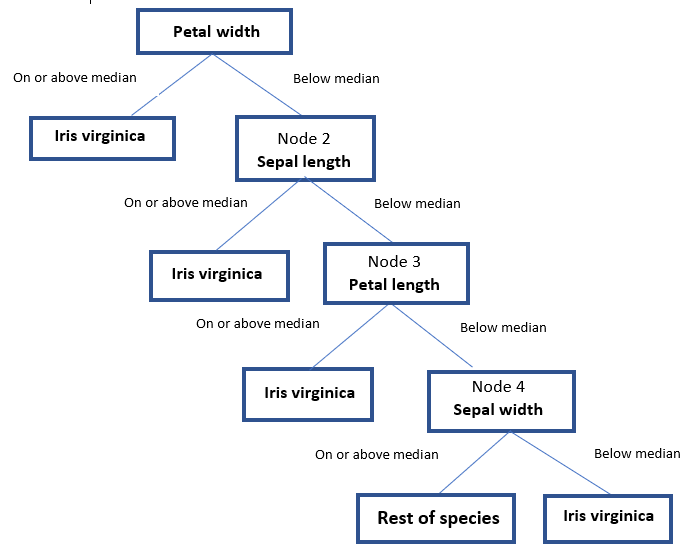

### 9.2 `Iris setosa`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Total Gini Index I.set|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|----------------------|------------|-----------|------------|-----------|
|Gini Index|0.2514|0.2825|0.0827|0.1347|

The order of the nodes is:

1. Petal length
2. Petal width
3. Sepal length
4. Sepal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris set.|0.0|0.617|0.0|0.0|
|above not Iris set.|1.0|0.383|1.0|1.0|


|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris set.|0.6|0.0689|0.8684|0.7857|
|below not Iris set.|0.4|0.931|0.1316|0.2143|


First node: **petal length** has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.

Second node: **petal width** has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.

Third node: **sepal length** has 0% occurrences of `Iris setosa` being above the indicator, so they must be **below**.

Fourth node: **sepal width** has 93% probability of being below the indicator and **not** `Iris setosa`, so they must be **above**.

This decision tree follows the same splits as with the median indicator:

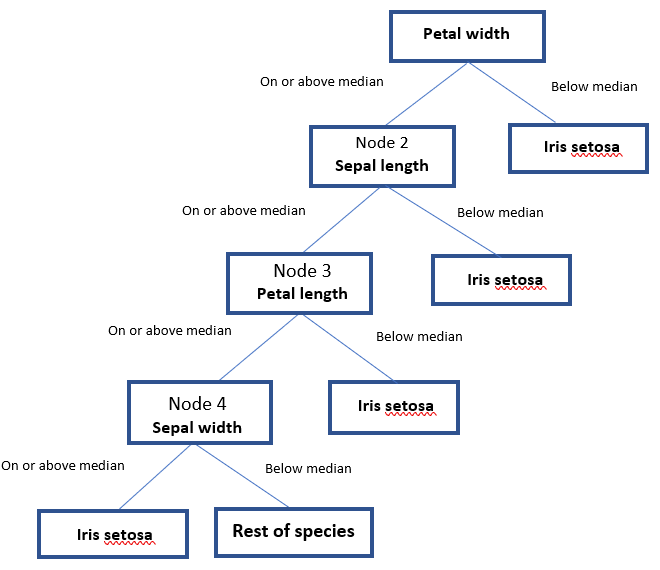

### 9.3 `Iris versicolor`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.4405|0.37256|0.21371|0.4424|

The order of the nodes is:

1. Petal length
2. Sepal width
3. Sepal length
4. Petal width

The conditioned probabilities are:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|above Iris ver.|0.36|0.1489|0.4477|0.4127|
|above not Iris ver.|0.64|0.851|0.5522|0.587|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------|
|below Iris ver.|0.3091|0.4827|0.1316|0.2143|
|below not Iris ver.|0.6909|0.5172|0.8684|0.7857|

First node: **petal length** has 86.7% occurrences of **no** `Iris versicolor` being below the indicator, so they must be **above**. The probabilities above do not carry much information, as they are very similar.

Second node: **sepal width** has 85% occurrences of **no** `Iris versicolor` being above the indicator, so they must be **below**. The percentages below are very similar and not significative.

Third node: **sepal length** has 64% occurrences of **no** `Iris versicolor` being above the indicator, but 66% of **no** being below. All numbers are very similar, so we can choose 36% **above** over 30.9% below.

Fourth node: **petal width** has 78% probability of being **not** below the indicator and not `Iris versicolor`, so they must be **above**. The percentages of above of the species and not the species is very similar, so better use the below percentage for classification purposes.

This decision tree follows the same splits as with the median indicator, however the species is located in different splits:

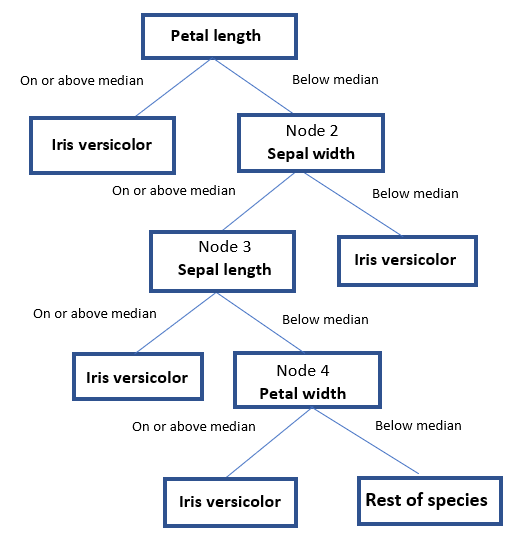

### 10 - EFFICIENCY OF THE DECISION TREES

#### 10.1 Test efficiency of the decision tree for `Iris virginica`.

In [91]:
def predict_species(df):
    if df['petal-width'] >= pw_indicator:
        if df['sepal-length'] >= sl_indicator:
            if df['petal-length'] >= pl_indicator:
                #if df['sepal-width'] <= sw_indicator:
                #    return "Iris-virginica"
                #else:
                #    return None
                return "Iris-virginica"
            else:
                return None
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.26666666666666666


The efficiency of classification of `Iris virginica` is 13.4% considering the 4 nodes.<br>
With the first 3 nodes the efficiency is 26.7%.<br>

#### 10.2 Test efficiency of the decision tree for `Iris setosa`.

In [93]:
def predict_species(df):
    if df['petal-length'] <= pl_indicator:
        if df['petal-width'] <= pw_indicator:
            if df['sepal-length'] <= sl_indicator:
                #if df['sepal-width'] >= sw_indicator:
                #    return "Iris-setosa"
                #else:
                #    return None
                return "Iris-setosa"
            else:
                return None
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size)

Proportion correctly identified 0.37777777777777777


The efficiency of classification of `Iris setosa` is 28.9% when all nodes are included. With the first 3 nodes, the efficiency increases to 37.8%.

In [95]:
def predict_species(df):
    if df['petal-length'] >= pl_indicator:
        if df['sepal-width'] <= sw_indicator:
            if df['sepal-length'] >= sl_indicator:
               # if df['petal-width'] >= pw_indicator:
               #     return "Iris-versicolor"
               # else:
               #     return None
                return "Iris-versicolor"
            return None
            #return "Iris-versicolor"
        else:
            return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.15555555555555556


The efficiency of classification of `Iris versicolor` is 15.5% when all nodes are taken or only 3 are used.

### 11 - PLOT GRAPH

In [97]:
For the petals we have:

SyntaxError: invalid syntax (Temp/ipykernel_11712/1610727888.py, line 1)

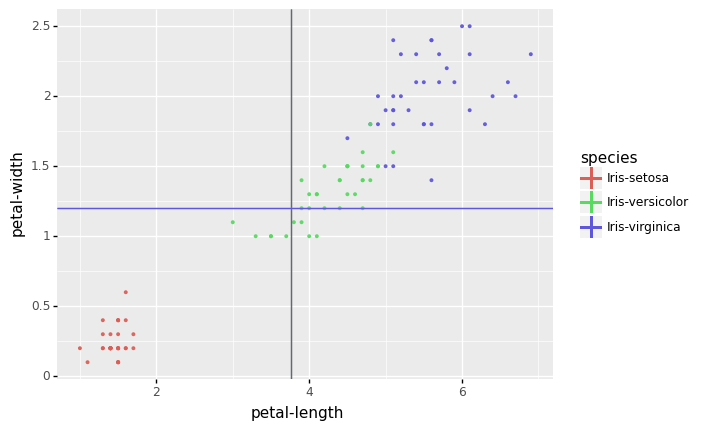

<ggplot: (161438006950)>

In [98]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=pl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=pw_indicator, color='species'))
)

For the sepals we have:

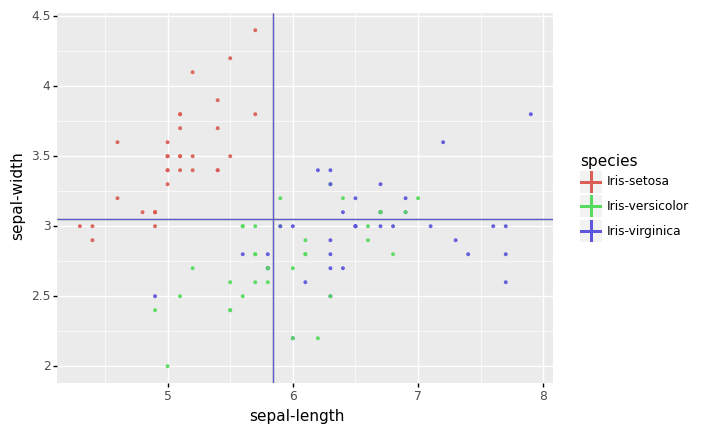

<ggplot: (161438154906)>

In [99]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=sl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=sw_indicator, color='species'))
)

### CONCLUSION

The decision trees are the same as with the Median 80/20.

The efficiency seems to be more regular across all species and nodes(13 to 38%), while using the median gives values of efficiency that range from 0% but go up to 47%. The medians give more volatile efficiencies, while the means give more consistent ones.

This needs to be compared with the means splitted 80/20 and see if they have the same consistency as with 70/30.